# INSURANCE PREMIUM PREDICTIOR

In this project we will be building several model which best fits the provided dataset in order to predict insurance premium based on people medical expenses.

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Reading Insurance dataset provided with the project in .csv format, and showing partly how the data looks like
dataset = pd.read_csv('../Dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Findings
#### 1. There is no missing values in any column
#### 2. There are 3 categorical variable
#### 3. Total Number of columns is 1338

<AxesSubplot:>

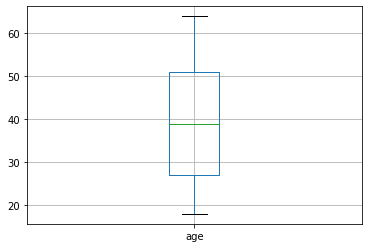

In [7]:
dataset.boxplot("age")
# Finding by seeing boxplot
# 1. Atleast 50% people that are purchasing insurance are between age 27 and 51.
# 2. Median Age is 39.
# 3. The youngest person that have insurance is 18, which could be the minimum age required for insurance.
# 4. Maximum age the people are willing to purchase insurance is 64

<AxesSubplot:>

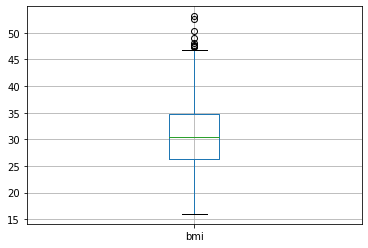

In [8]:
dataset.boxplot("bmi")
#BMI Score and Meaning: <18 : Underweight, 18 to 25 : Normal, 25> : Overweight and obease
# Finding by seeing boxplot
# 1. Atleast 50% people have bmi between 26 and 35 which is overweight and obese category, 
# 2. Atleast 75% people is in the category of overweight or obease and this may imply that overall policyholder could be unhealthy
# 3. Around 25% people have bmi between 26 and and 14, which indicates that people have normal or underweight bmi.
# 4. This box plot have outlier, find the link to understand more about outliers
#    -> https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#    -> https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309

<AxesSubplot:>

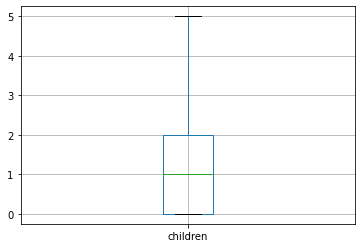

In [9]:
dataset.boxplot("children")
# Finding by seeing boxplot
# 1. Atleast 75% people have 2 child or less.
# 2. Around 25% people have more than 2 children.
# 3. Atleast 50% people have 1 child or less.

<AxesSubplot:>

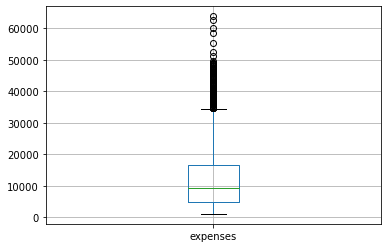

In [10]:
dataset.boxplot("expenses")
#Findings 

<AxesSubplot:title={'center':'expenses'}, xlabel='smoker'>

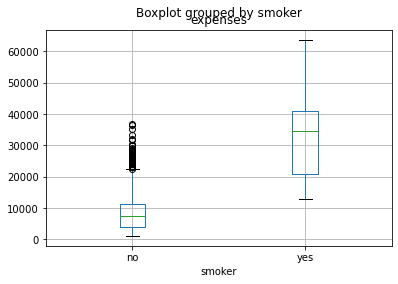

In [11]:
dataset.boxplot("expenses",by="smoker", )
#Findings 

In [12]:
#lets see what could data tell us more
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [13]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [14]:
dataset.cov()

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


In [15]:
dataset.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [16]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Lets find out duplicate values if any

In [17]:
dataset.duplicated().value_counts()

False    1337
True        1
dtype: int64

### There is one duplicate values, we will drop this value

In [18]:
dataset.drop_duplicates(inplace=True)

In [19]:
dataset.duplicated().value_counts()
#Now no duplicate values are there.

False    1337
dtype: int64

<AxesSubplot:>

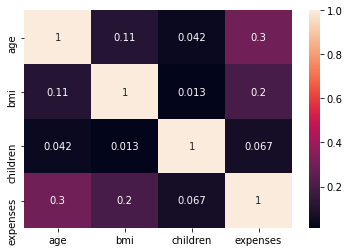

In [20]:
sb.heatmap(dataset.corr(), annot=True)

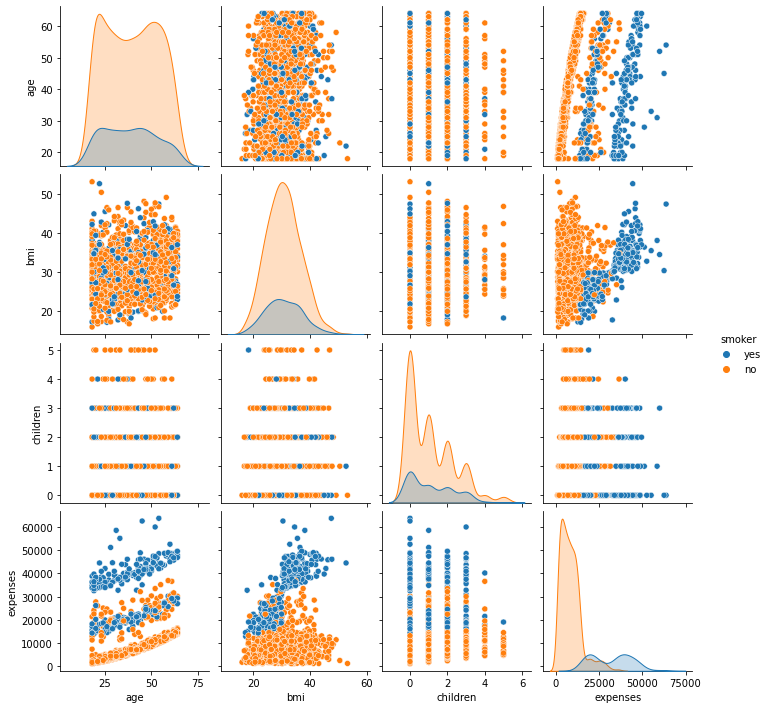

In [21]:
sb.pairplot(dataset, hue="smoker")

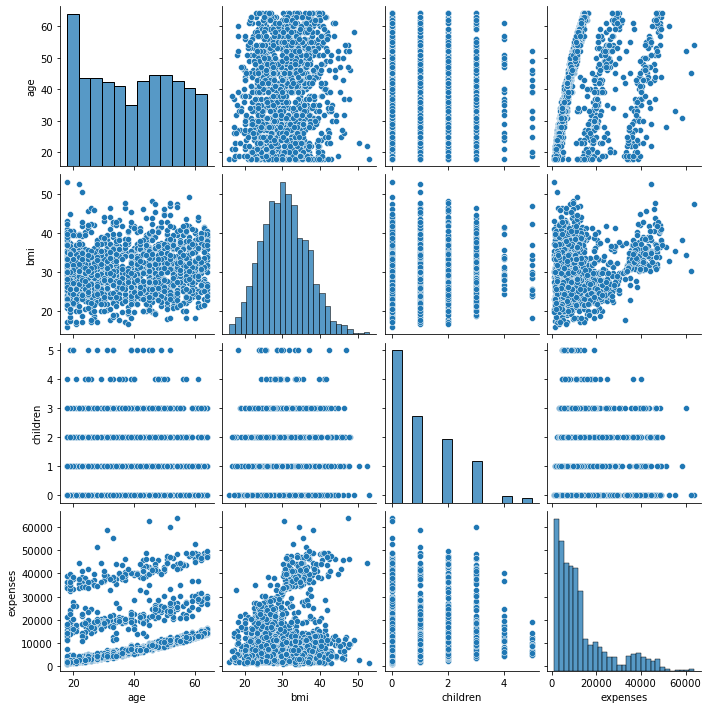

In [22]:
sb.pairplot(dataset)

<AxesSubplot:>

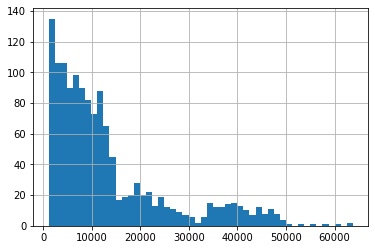

In [23]:
dataset.expenses.hist(bins=50)

<AxesSubplot:>

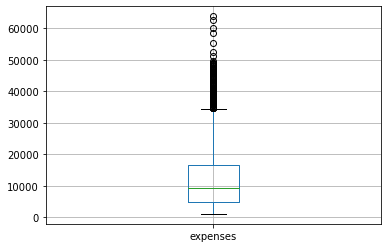

In [24]:
dataset.boxplot(column=['expenses'])

In [25]:
# dataset[dataset['expenses']>50000]
dataset.drop(dataset[dataset['expenses']>50000].index, inplace=True)

In [26]:
dataset['expenses'].describe()

count     1330.000000
mean     13045.345165
std      11699.581614
min       1121.870000
25%       4724.372500
50%       9303.295000
75%      16389.830000
max      49577.660000
Name: expenses, dtype: float64

## Now lets encode dummy variable. We will perform different encoding techniques and see difference in result if any.

In [27]:
#We know there are 3 categorical variable, which is sex, smoker, region.
#Firstly we will be applying one hot encoding technique to create dummy variables. Also to avoid dummy variable trap, 
# will drop one of the column, probably first one

## One Hot Encoding

In [28]:
# 1. By One hot encoding
dataset_oh = pd.get_dummies(dataset, drop_first=True)

In [29]:
dataset_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [30]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
y = dataset_oh['expenses']
dataset_oh.drop(columns=['expenses'], inplace=True)
X = dataset_oh

## Making our first regression model to predict medical expense

In [31]:
# Dividing our dataset to training and test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [32]:
X_train.count()

age                 886
bmi                 886
children            886
sex_male            886
smoker_yes          886
region_northwest    886
region_southeast    886
region_southwest    886
dtype: int64

In [33]:
y_test.values

array([ 2020.55,  8823.99,  6753.04, 15230.32, 21472.48,  7512.27,
       14256.19, 23045.57,  6113.23,  6770.19, 34838.87,  7256.72,
        8606.22, 41676.08, 11842.44, 13844.51, 25309.49,  1252.41,
        3062.51,  4527.18,  7173.36,  9432.93,  1615.77,  6796.86,
       12609.89,  7144.86,  3645.09,  6610.11, 14418.28,  5245.23,
       17178.68,  2026.97, 36307.8 ,  8520.03,  8596.83,  1880.49,
        1631.82,  1136.4 , 28868.66,  8733.23,  4747.05, 13393.76,
        7323.73, 12557.61, 11763.  , 48675.52, 26140.36, 46130.53,
        5375.04,  7633.72,  8410.05, 12797.21,  3736.46, 10370.91,
        1712.23, 24667.42,  4466.62, 12981.35,  4032.24, 36189.1 ,
        5709.16,  3925.76, 28287.9 , 11658.38, 15019.76,  1984.45,
       23065.42,  7133.9 , 35491.64,  7281.51,  3021.81,  7935.29,
        2709.11,  8601.33,  7731.86,  1972.95,  4500.34, 42211.14,
        8116.27, 17085.27,  5584.31,  8944.12, 11945.13, 11394.07,
       12731.  , 22192.44, 48885.14,  5354.07,  1261.86,  3943

In [34]:
dataset.shape[0]*2/3

886.6666666666666

In [35]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

In [36]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predict = linearModel.predict(X_test)

In [38]:
y_predict.shape

(444,)

In [39]:
linearModel.score(X_test, y_test)
# We are getting 78.2% accuracy using one hot encoding.

0.7979514008998279

## Our first model of linear regression gave an 78.2 % accuracy

## Linear Regression with Cross Validation

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
# parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
mse = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-37297952.482934214


## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
ridge_Regression = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv=5)
# ridge_Regression.fit(X,y)

In [42]:
ridge_Regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 1e-35, 1, 5, 10,
                                   15, 20, 25, 50, 75, 100, 150]},
             scoring='neg_mean_squared_error')

In [43]:
print(ridge_Regression.best_params_)
print(ridge_Regression.best_score_)

{'alpha': 1}
-37289743.33698939


In [44]:
ridge_Regression.score(X_test, y_test)

-29776896.162497185

## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
lasso_Regression = GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv=5)
# lasso_Regression.fit(X,y)

In [46]:
lasso_Regression.fit(X_train, y_train)

C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13027802555.459503, tolerance: 9015721.937240181
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12564736351.552837, tolerance: 9027844.616878862
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12744519152.155144, tolerance: 9863356.615845941
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Ob

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 1e-35, 1, 5, 10,
                                   15, 20, 25, 50, 75, 100, 150]},
             scoring='neg_mean_squared_error')

In [47]:
print(lasso_Regression.best_params_)
print(lasso_Regression.best_score_)

{'alpha': 75}
-37154116.72173357


In [48]:
lasso_Regression.score(X_test, y_test)

-29952410.419801436

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [50]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
regressor.score(X_test, y_test)

0.7123921285903373

In [52]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [53]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(regressor, filled=True)

[Text(924.7156937024131, 530.6571428571428, 'X[4] <= 0.5\nmse = 131714705.328\nsamples = 886\nvalue = 13003.532'),
 Text(595.1358158310836, 504.7714285714286, 'X[0] <= 42.5\nmse = 37521925.284\nsamples = 711\nvalue = 8597.606'),
 Text(321.2569508167506, 478.8857142857143, 'X[2] <= 0.5\nmse = 26812124.05\nsamples = 406\nvalue = 5724.329'),
 Text(139.73908724140023, 453.0, 'X[0] <= 22.5\nmse = 19756976.472\nsamples = 175\nvalue = 4096.229'),
 Text(75.8731723594006, 427.11428571428576, 'X[1] <= 30.8\nmse = 12383657.358\nsamples = 80\nvalue = 2685.574'),
 Text(43.28960140751077, 401.22857142857146, 'X[3] <= 0.5\nmse = 169927.186\nsamples = 43\nvalue = 1878.826'),
 Text(23.104713947703697, 375.34285714285716, 'X[7] <= 0.5\nmse = 101618.518\nsamples = 20\nvalue = 2170.043'),
 Text(13.710489595340654, 349.4571428571429, 'X[0] <= 19.5\nmse = 80845.356\nsamples = 14\nvalue = 2296.604'),
 Text(8.124734575016685, 323.57142857142856, 'X[6] <= 0.5\nmse = 47187.639\nsamples = 6\nvalue = 2089.635'),


Error in callback <function flush_figures at 0x000001BDCD03E820> (for post_execute):


KeyboardInterrupt: 

In [54]:
print(tree.export_text(regressor))

|--- feature_4 <= 0.50
|   |--- feature_0 <= 42.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_0 <= 22.50
|   |   |   |   |--- feature_1 <= 30.80
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 19.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 28.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  28.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [2128.43]
|   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [1607.51]
|   |   |   |   |   |   |   |--- feature_0 >  19.50
|   |   |   |   | 

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13, min_samples_split=20)

In [56]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=20, n_estimators=400,
                      random_state=13)

In [57]:
rf_regressor.score(X_test, y_test)

0.8888605386467189

## KNN Regressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [59]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [60]:
knn_regressor.score(X_test, y_test)

0.14862693703905827

## Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
dataset_oh = pd.get_dummies(dataset, drop_first=True)
dataset_oh

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [63]:
df_sc = pd.DataFrame(scaler.fit_transform(dataset_oh), columns=dataset_oh.columns)

In [64]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
ys = df_sc['expenses']
df_sc.drop(columns=['expenses'], inplace=True)
Xs = df_sc

In [65]:
X_trains, X_tests, y_trains, y_tests = train_test_split(Xs, ys, test_size = 1/3)

In [66]:
X_trains

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1319,0.839977,-0.104305,-0.081072,0.991018,-0.501175,-0.565194,1.635247,-0.566352
909,-0.441425,-0.991147,0.748353,0.991018,-0.501175,1.769303,-0.611528,-0.566352
440,-0.441425,0.470501,-0.910496,-1.009064,1.995313,-0.565194,-0.611528,1.765686
679,0.982355,-1.040416,-0.910496,0.991018,-0.501175,1.769303,-0.611528,-0.566352
463,-1.438072,-0.892609,-0.910496,0.991018,-0.501175,1.769303,-0.611528,-0.566352
...,...,...,...,...,...,...,...,...
460,0.199276,-0.104305,-0.910496,0.991018,1.995313,-0.565194,-0.611528,1.765686
37,-0.299047,0.996037,-0.081072,0.991018,1.995313,-0.565194,-0.611528,-0.566352
215,0.982355,-0.662687,-0.910496,-1.009064,-0.501175,1.769303,-0.611528,-0.566352
1195,0.484032,1.603689,0.748353,0.991018,-0.501175,1.769303,-0.611528,-0.566352


In [67]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lrs = LinearRegression()
lrs.fit(X_trains, y_trains)
lrs.score(X_tests, y_tests)

0.7268343455707595

In [68]:
## Previously we were getting 79% accuracy but now after doing feature scaling, we are getting 71.8% accuracy, efficiently decreased

In [69]:
## Decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_trains, y_trains)
regressor.score(X_tests, y_tests)

0.6181670825290986

In [70]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [71]:
## Previously we were getting 67.1% accuracy but now after doing feature scaling, we are getting 65.5% accuracy, efficiently decreased

In [72]:
## Random forest regressor

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13, min_samples_split=20)
rf_regressor.fit(X_trains, y_trains)
rf_regressor.score(X_tests, y_tests)

0.8384536211121376

In [73]:
## Previously we were getting 89.6% accuracy but now after doing feature scaling, we are getting 83.85% accuracy,
## performance has decreased.

In [74]:
## KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_trains, y_trains)
knn_regressor.score(X_tests, y_tests)

0.7665485083923111

In [75]:
## Previously we were getting 17.4% accuracy but now after doing feature scaling, we are getting 76.39% accuracy,
## performance has significantly improved

In [ ]:
import pickle

In [77]:
pickle.dump(rf_regressor, open("model.pkl", "wb"))

<IPython.core.display.Javascript object>

In [78]:
model = pickle.load(open("model.pkl", "rb"))

<IPython.core.display.Javascript object>

In [80]:
y_pred = model.predict(X_tests)

In [81]:
model.score(X_tests, y_tests)

0.8384536211121376